In [19]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [20]:
X = [[0, 0], [1, 1]]
y = [0, 1]

In [21]:
clf = clf.fit(X, y)

In [22]:
clf.predict([[2., 2.]])

array([1])

In [23]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [24]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

In [25]:
import scipy
scipy.stats.describe(iris.data[:,:5])

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

In [26]:
import numpy as np 
np.bincount(iris.target)

array([50, 50, 50], dtype=int64)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [28]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

[Text(0.4, 0.9, 'x[2] <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[3] <= 1.75\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'x[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

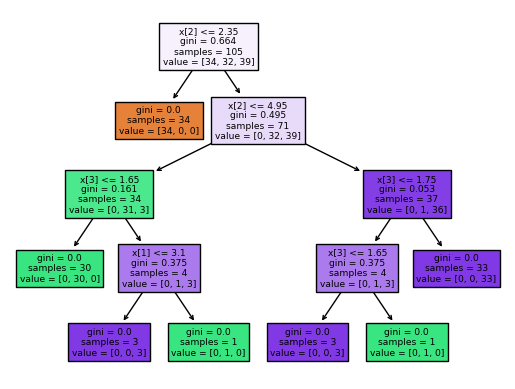

In [29]:
tree.plot_tree(clf, filled=True)

In [30]:
# On exporte le graphe dans le fichier iris.dot
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, filled=True)

In [31]:
clf = tree.DecisionTreeClassifier(max_depth = 3)

In [32]:
clf = tree.DecisionTreeClassifier(min_samples_leaf = 20)

In [33]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target,
            test_size=0.95, random_state=0)

for mdepth in [1, 2, 3, 4, 5, 6, 7]:
    clf = tree.DecisionTreeClassifier(max_depth=mdepth)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

for msplit in [2, 3, 5, 10, 15, 20]:
    clf = tree.DecisionTreeClassifier(min_samples_split=msplit)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

0.6223776223776224
0.7062937062937062
0.951048951048951
0.8111888111888111
0.8881118881118881
0.7972027972027972
0.951048951048951
0.7552447552447552
0.951048951048951
0.6573426573426573
0.32167832167832167
0.32167832167832167
0.32167832167832167


In [35]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target,
    test_size=0.30, random_state=0)
from sklearn.model_selection import GridSearchCV
pgrid = {"max_depth": [1, 2, 3, 4, 5, 6, 7],
      "min_samples_split": [2, 3, 5, 10, 15, 20]}
grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=pgrid, cv=10)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_.score(X_test, y_test)

0.9777777777777777

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_5284\1133000338.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)


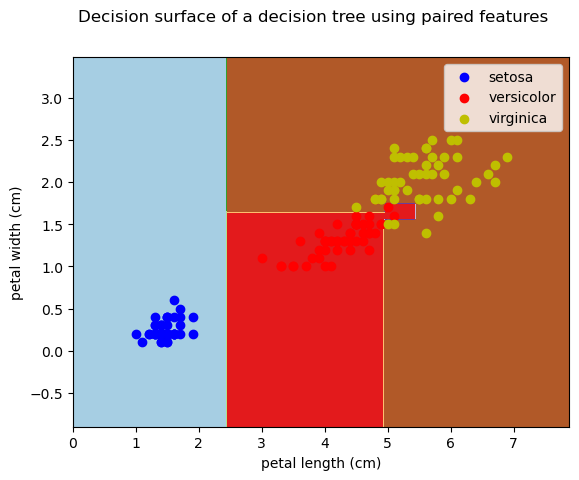

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02

# Choisir les attributs longueur et largeur des pétales
pair = [2, 3]

# On ne garde seulement les deux attributs
X = iris.data[:, pair]
y = iris.target

# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)

# Affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

# Affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

In [37]:
from sklearn import tree

X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([0.5])

Text(0.5, 1.0, 'Signal sinusoïdal bruité')

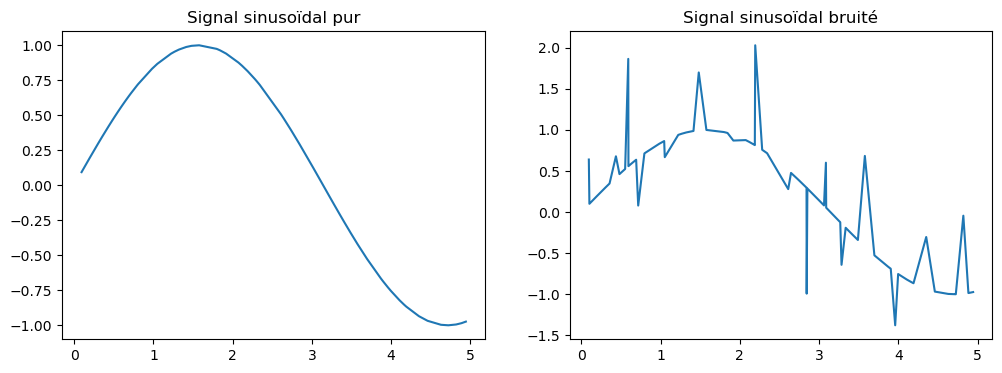

In [38]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor

# Créer les données d'apprentissage
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()

fig = plt.figure(figsize=(12, 4))
fig.add_subplot(121)
plt.plot(X, y)
plt.title("Signal sinusoïdal pur")

# On ajoute un bruit aléatoire tous les 5 échantillons
y[::5] += 3 * (0.5 - np.random.rand(16))
fig.add_subplot(122)
plt.plot(X, y)
plt.title("Signal sinusoïdal bruité")

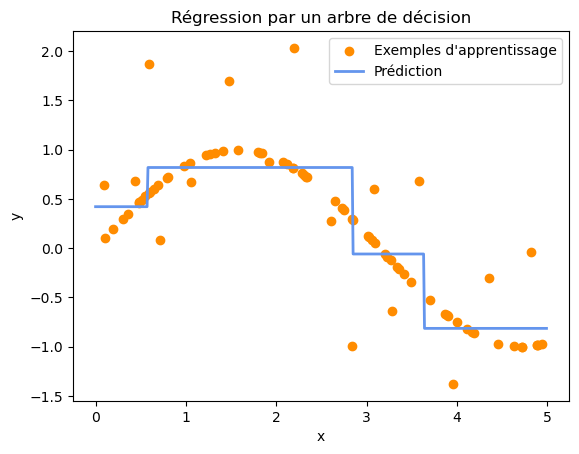

In [39]:
# Apprendre le modèle
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X, y)

# Prédiction sur la même plage de valeurs
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = reg.predict(X_test)

# Affichage des résultats
plt.figure()
plt.scatter(X, y, c="darkorange", label="Exemples d'apprentissage")
plt.plot(X_test, y_pred, color="cornflowerblue", label="Prédiction", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression par un arbre de décision")
plt.legend()
plt.show()

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X_train, X_test, y_train, y_test = model_selection.train_test_split(diabetes.data, diabetes.target, test_size=0.30, random_state=0)

clf = DecisionTreeRegressor(max_depth=4)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
mean_squared_error(y_test, y_predicted)
# --> 4365.3425018803518

pgrid = {"max_depth": [2, 3, 4, 5, 6, 7]}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid=pgrid, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train, y_train)
y_predicted = grid_search.best_estimator_.predict(X_test)
mean_squared_error(y_test, y_predicted)
# --> 4029.0729322641987
grid_search.best_params_
# -->{'max_depth': 2}

{'max_depth': 2}